In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd code/
from main import main

C:\Users\jackj\school\fall2024\orie4580\gender-bias-analysis\code


In [2]:
def visualize_path_percentage(path, identities, num_levels):
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]
    
    # Prepare data for plotting percentages
    percentages = {identity: [] for identity in identities}
    for state in states:
        total_employees = sum(
            sum(state.get_count(level, identity) for identity in identities) for level in range(num_levels)
        )
        for identity in identities:
            total_identity_count = sum(state.get_count(level, identity) for level in range(num_levels))
            percentages[identity].append(total_identity_count / total_employees)
    
    # Prepare cumulative percentages for filling
    cumulative_percentages = np.zeros(len(times))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    for identity in identities:
        identity_percentages = np.array(percentages[identity])
        plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
        plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
        cumulative_percentages += identity_percentages
    
    plt.xlim(0, times[-1])
    plt.ylim(0, 1)
    
    # Add labels and legend
    plt.xlabel("Time")
    plt.ylabel("Percentage of Employees")
    plt.title("Overall Employee Identity Distribution Over Time")
    plt.legend(title="Identities", loc="upper right")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

def visualize_path_percentage_by_level(path, identities, num_levels):
    """
    Visualizes the state throughout the path as a step graph with filled regions
    for each level individually.

    Parameters:
        path (list of tuples): A list where each element is a tuple (time, state),
                               with state being a SimpleWorkplaceState.
        identities (list): List of identities (e.g., ["F", "M"]).
        levels (list): List of levels (e.g., ["0", "1", "2"]).
    """
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]  # Each state is a SimpleWorkplaceState
    
    # Create a plot for each level
    for level in range(num_levels):
        # Prepare data for plotting percentages at the current level
        percentages = {identity: [] for identity in identities}
        for state in states:
            total_employees_at_level = sum(state.get_count(level, identity) for identity in identities)
            for identity in identities:
                identity_count = state.get_count(level, identity)
                if total_employees_at_level > 0:
                    percentages[identity].append(identity_count / total_employees_at_level)
                else:
                    percentages[identity].append(0)  # Avoid division by zero
        
        # Prepare cumulative percentages for filling
        cumulative_percentages = np.zeros(len(times))
        
        # Create the plot for this level
        plt.figure(figsize=(12, 8))
        for identity in identities:
            identity_percentages = np.array(percentages[identity])
            plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
            plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
            cumulative_percentages += identity_percentages
        
        # Customize the plot for this level
        plt.xlim(0, times[-1])
        plt.ylim(0, 1)
        plt.xlabel("Time")
        plt.ylabel("Percentage of Employees")
        plt.title(f"Employee Identity Distribution Over Time at Level {level}")
        plt.legend(title="Identities", loc="upper right")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.tight_layout()
        plt.show()


In [3]:
path, model = main(100)

Simulation time: 10.01
Simulation time: 20.01
Simulation time: 30.04
Simulation time: 40.04
Simulation time: 50.05
Simulation time: 60.06
Simulation time: 70.07
Simulation time: 80.07
Simulation time: 90.08


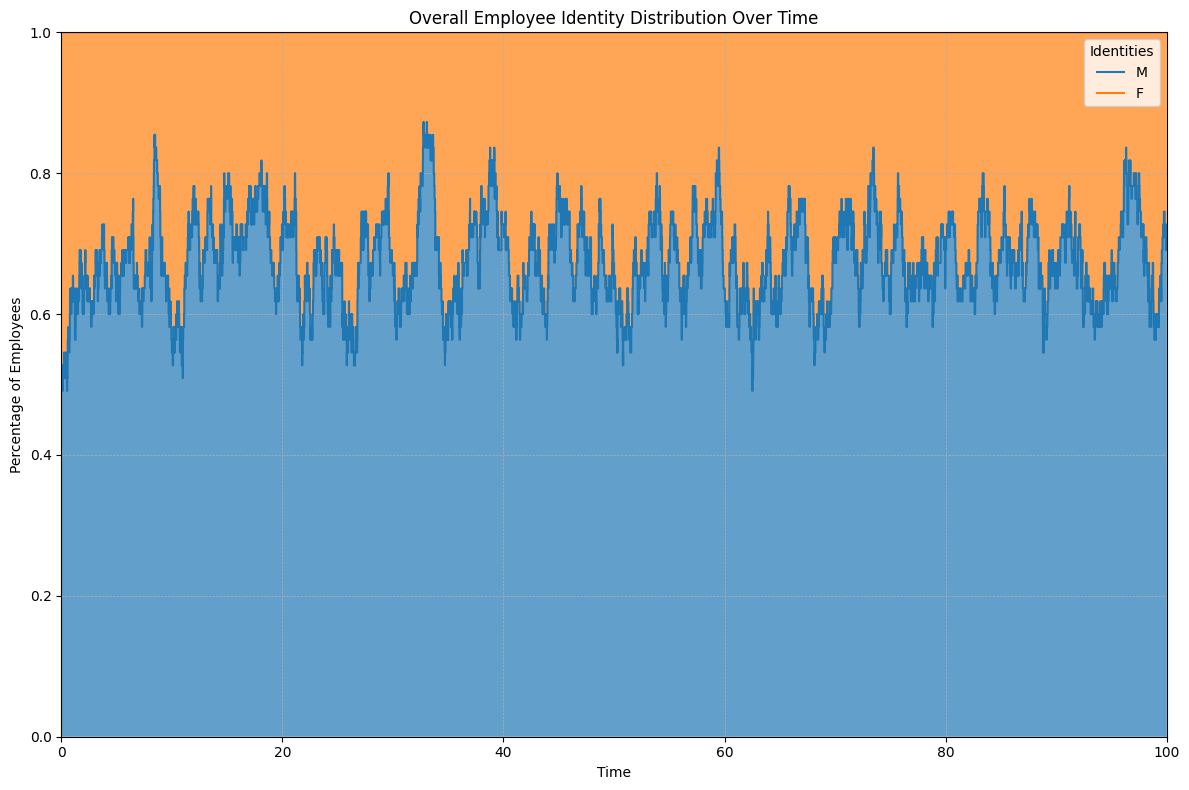

In [4]:
identities=["M", "F"]
num_levels=4
visualize_path_percentage(path, identities, num_levels)

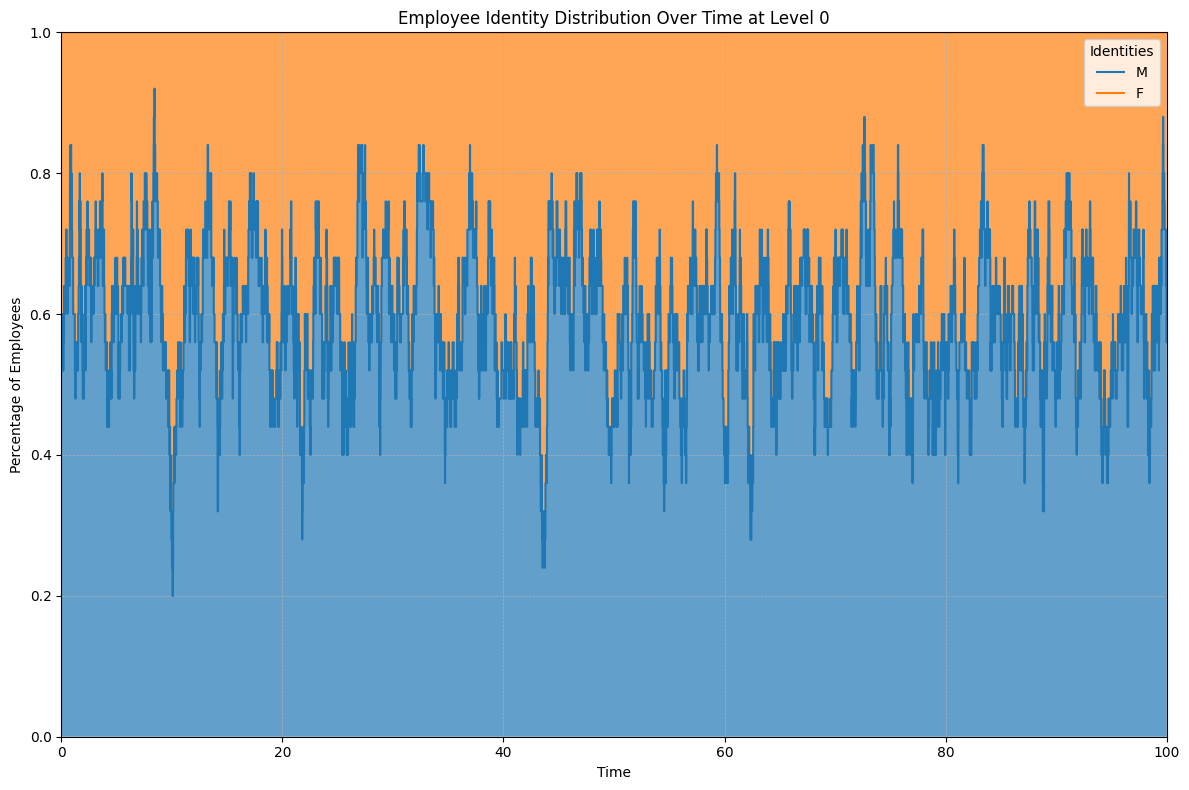

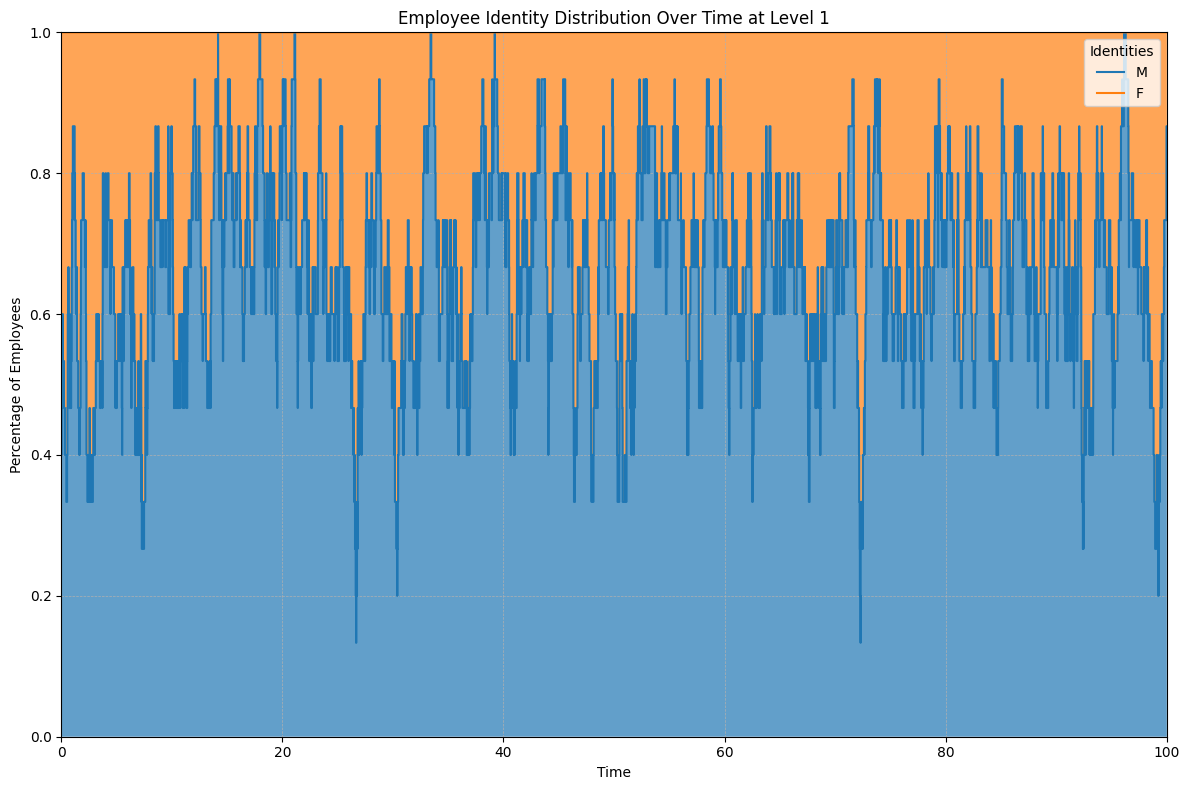

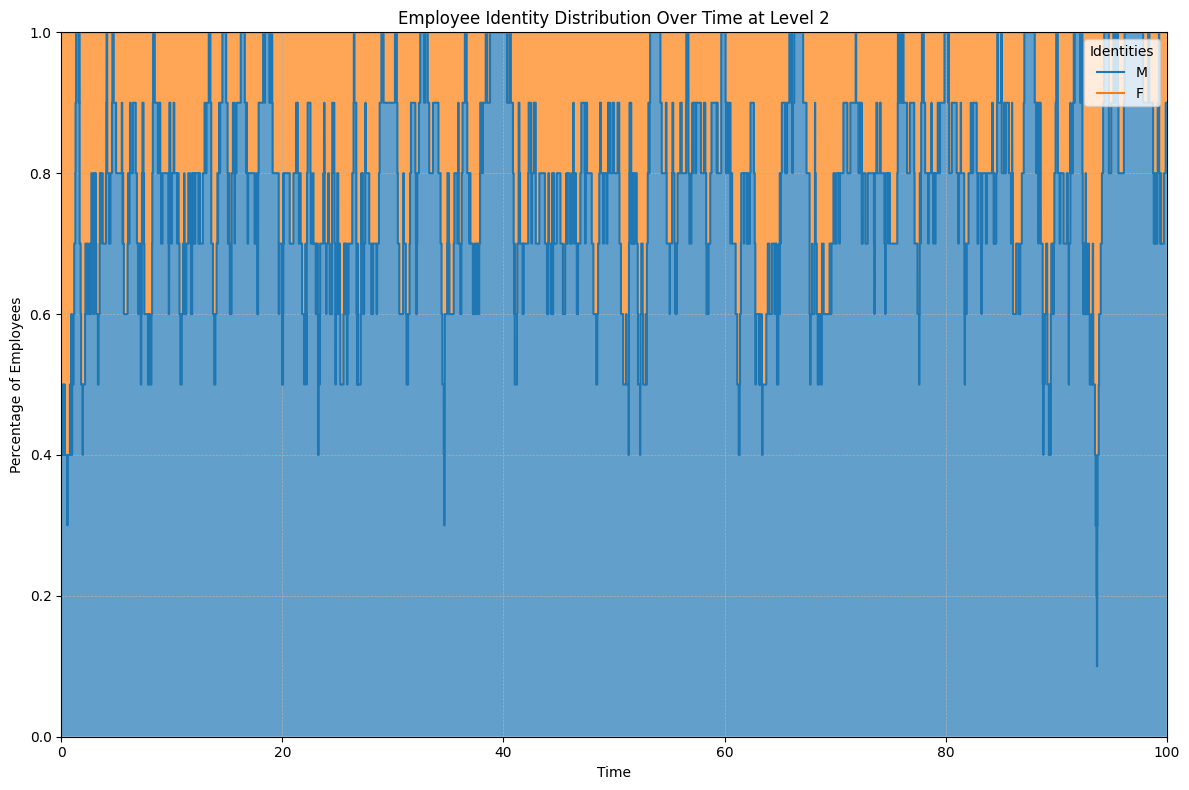

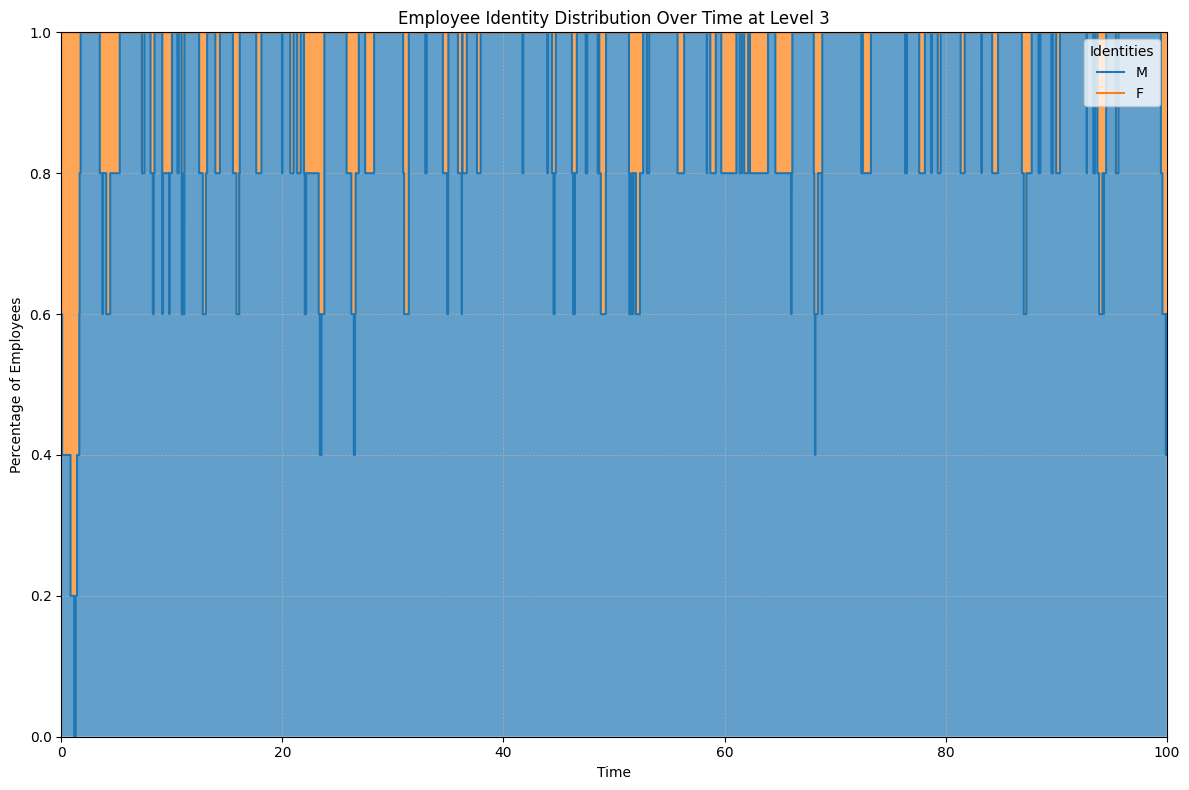

In [5]:
visualize_path_percentage_by_level(path, identities, num_levels)

In [ ]:
counts = {'M' : 0, 'F' : 0}
for event_type, time, event_details, rate_details in model.log:
    print(rate_details)
    if len(event_details) > 0:
        identity = event_details[-1][0].identity
        counts[identity] += 1
print(counts, counts['M'] / (counts['M'] + counts['F']))

(27.368144502535724, 0.46618588115035775, 27.5, 14.0)
(27.479645060477857, 1.1773559175889705, 27.5, 14.0)
(27.44519786907138, 1.4834535994229714, 27.5, 14.0)
(27.60755698795308, 2.517805727425588, 27.5, 14.0)
(27.688738801491017, 2.8382107788426008, 27.5, 13.5)
(27.443028873855006, 2.797801488738808, 27.5, 13.5)


IndexError: list index out of range

In [7]:
for employee in path[-1][1].employees:
    print(employee.identity, employee.bias_score)

M 0.8354548705461985
M 0.6063888508765062
M 0.2641774788467671
F 1.6453554121429956
M 0.4696101263151164
M 0.3215805230715089
M 0.49797754376054987
M 0.24523681775403533
F 1.074815333273098
M 0.19308305420183577
M 0.13136764848537275
F 0.507281130838034
M 0.17319991534314771
M 0.11133759400250749
F 0.9555296670974168
M 0.24957546982740084
M 0.1976268732457775
M 0.1673543396122957
M 0.09512187474942979
F 0.48104347249842666
M 0.19932123670546326
M 0.1432950101130178
F 0.45110152063881925
F 0.3113194683979554
M 0.08307067962339171
F 0.45284546283920163
M 0.07036150554649266
F 0.27785100600772644
M 0.13998388869041914
M 0.08138542903271927
M 0.06275789885252007
F 0.30087363895925445
M 0.05272924559619679
F 0.1875519870024806
F 0.1695267173755471
F 0.271198249171492
M 0.04047914997864225
M 0.035899007662583415
M 0.026883115313924535
M 0.026295977406998353
F 0.08232365228494087
M 0.02052204998999362
M 0.01851472900376496
F 0.06893092328725739
M 0.01687092409049447
M 0.013440509149239962
M 0